In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("customer_segmentation.csv")
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
0,130,65,213.905831,31.600751,233
1,543,46,639.223004,5.689175,228
2,221,84,180.754616,64.283300,243
3,345,77,1314.029384,12.095727,230
4,222,61,3869.409086,117.499331,257


In [3]:
import plotly.express as px

fig = px.scatter_3d(df, x='n_clicks', y='amount_spent', z='amount_discount', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()

In [4]:
X = df.copy()
X.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,551.171843,94.605889,1457.332337,391.799755,201.060508
std,493.198719,38.922762,1164.965784,487.883553,99.289638
min,50.000000,10.000000,3.055344,0.191716,0.000000
25%,276.000000,67.000000,620.995325,57.592865,130.000000
50%,390.000000,92.000000,1041.661446,138.483623,200.000000
75%,569.000000,119.000000,1959.681861,689.631745,268.000000
max,3092.000000,259.000000,6567.402267,2428.406527,514.000000


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
X

array([[-0.85413202, -0.76078523, -1.06756558, -0.73843784,  0.32174491],
       [-0.01657241, -1.24902996, -0.70240208, -0.79155872,  0.27137703],
       [-0.66958499, -0.2725405 , -1.09602814, -0.6714359 ,  0.42248068],
       ...,
       [-0.50328986,  0.44697804,  0.03421785,  1.80657541,  0.0699055 ],
       [ 0.51273281,  0.65255476, -0.81966455, -0.03769343,  1.63130985],
       [ 0.5330127 ,  0.72964604, -0.05386935,  1.38096898,  0.47284856]])

In [7]:
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters =k,random_state=42,n_init="auto").fit(X) for k in range(1,10)]

inertias = [model.inertia_ for model in kmeans_per_k]

In [8]:
inertias

[12395.000000000002,
 8698.668499383277,
 6609.59430398605,
 5714.725085117212,
 5389.455851931888,
 4404.287574900125,
 4069.4579531435215,
 3822.0197108793086,
 3684.660212446558]

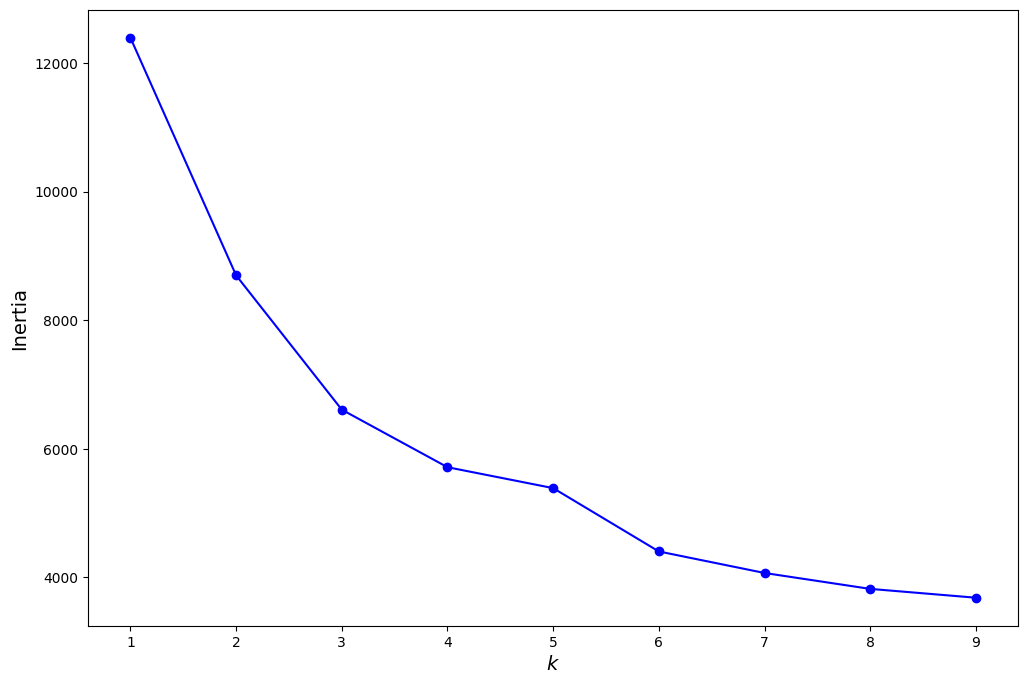

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
#plt.annotate('Elbow',xy=(3, inertias[2]),xytext=(0.55, 0.55),textcoords='figure fraction',fontsize=16,arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

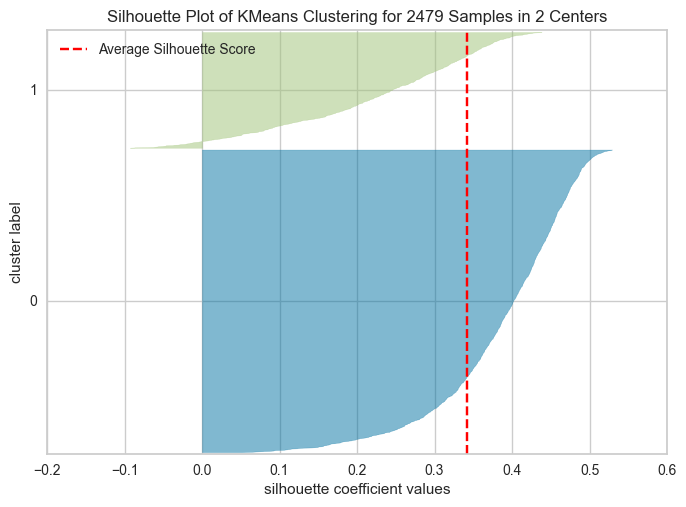

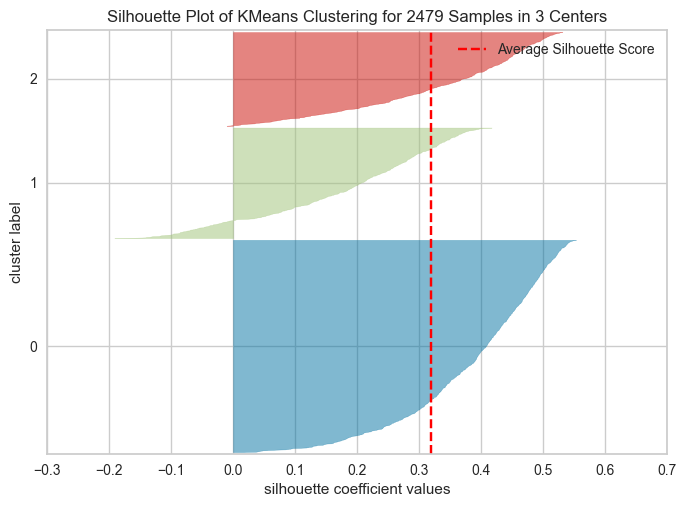

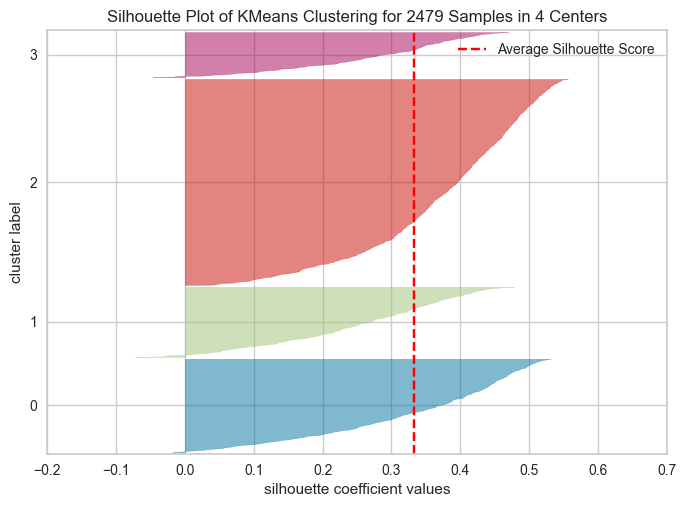

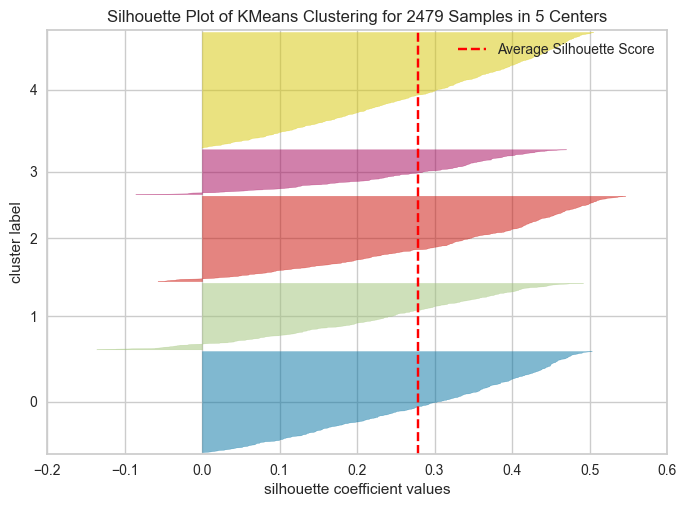

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2,6):
    km = KMeans(n_clusters=i,n_init=10,max_iter=100,random_state=42)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',figsize=[4,2])
    visualizer.fit(X)
    visualizer.show()

c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\SHARIQ\miniconda3\envs\python3_8\li

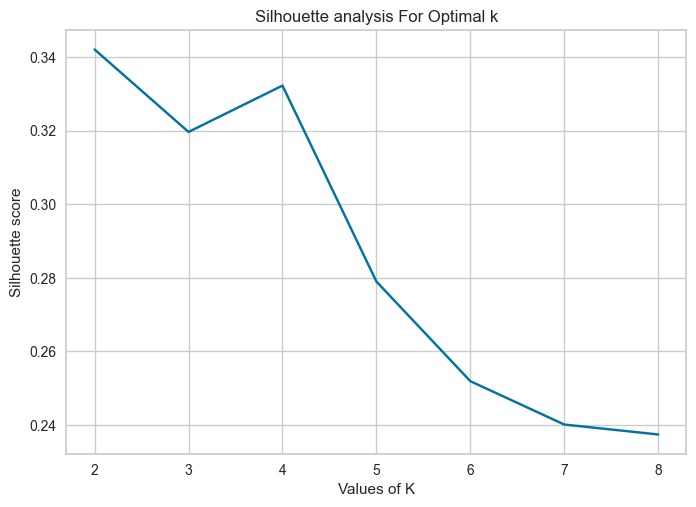

In [11]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=40)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [12]:
k = 4
km = KMeans(n_clusters= k)
km.fit(X)

c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [13]:
np.unique(km.labels_)

array([0, 1, 2, 3])

In [14]:
km.cluster_centers_

array([[-5.99910104e-01, -6.94470157e-01,  1.57365630e+00,
        -6.36789543e-01, -3.44047588e-02],
       [ 2.58572851e+00,  6.66735752e-01, -1.50560833e-01,
         1.27716018e+00, -1.04592539e-02],
       [ 9.56478281e-02,  8.65045232e-01, -3.06331375e-02,
         1.54318030e+00,  4.55610240e-02],
       [-3.27838301e-01, -1.26582699e-01, -6.69847989e-01,
        -5.17985709e-01,  2.34461731e-03]])

In [15]:
clusters = pd.DataFrame(X, columns=df.columns)
clusters['label'] = km.labels_
clusters.tail(3)

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,label
2476,-0.503290,0.446978,0.034218,1.806575,0.069906,2
2477,0.512733,0.652555,-0.819665,-0.037693,1.631310,3
2478,0.533013,0.729646,-0.053869,1.380969,0.472849,2


In [16]:
clusters["label"].value_counts()

label
3    1231
0     558
2     420
1     270
Name: count, dtype: int64

In [17]:
import plotly.express as px

fig = px.scatter_3d(clusters, x='n_clicks', y='amount_spent', z='amount_discount', color='label', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()

In [23]:
df_stocks = pd.read_csv("Stocks.csv",index_col=0)

In [41]:
df_stocks.shape

(46, 9)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_stocks)
X_stock = scaler.transform(df_stocks)

In [27]:
X_stock

array([[-3.83732041e-01,  8.17827835e-01, -7.19519915e-01,
        -4.84326756e-01, -6.42720290e-01, -5.04523557e-01,
         1.20533632e+00, -7.59821087e-01, -3.60298427e-01],
       [ 1.33384898e-01, -4.96196199e-01,  3.30622101e-01,
        -5.40866881e-01, -5.07665132e-01, -5.04523557e-01,
        -5.08546645e-01,  3.40752069e-01,  1.12945580e-01],
       [-1.90706434e-01,  1.04314371e-01,  4.06562123e-01,
        -1.41174598e-01, -4.12135591e-01, -2.50331081e-01,
         2.06227814e+00,  4.14861015e-01, -1.31614880e+00],
       [-6.10012542e-01, -5.50121640e-01, -5.31839575e-01,
         8.44016490e-01, -4.83236935e-01, -5.04523557e-01,
         1.52282873e-01, -5.38600352e-01,  2.30455648e-01],
       [ 5.35830498e-01, -5.08691883e-01,  1.19959292e+00,
         3.63527452e-01, -6.06351715e-01, -5.04523557e-01,
         2.58807306e+00,  1.22342280e+00, -1.00870310e+00],
       [-5.31534676e-02, -4.38010518e-01,  9.52080336e-02,
        -3.71209120e-01, -1.97356803e-01, -5.045235

In [28]:
scaled_df = pd.DataFrame(X_stock, columns=df_stocks.columns, index=df_stocks.index)

In [29]:
scaled_df

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,-0.383732,0.817828,-0.719520,-0.484327,-0.642720,-0.504524,1.205336,-0.759821,-0.360298
ASIANPAINT,0.133385,-0.496196,0.330622,-0.540867,-0.507665,-0.504524,-0.508547,0.340752,0.112946
AXISBANK,-0.190706,0.104314,0.406562,-0.141175,-0.412136,-0.250331,2.062278,0.414861,-1.316149
BAJAJ-AUTO,-0.610013,-0.550122,-0.531840,0.844016,-0.483237,-0.504524,0.152283,-0.538600,0.230456
BAJFINANCE,0.535830,-0.508692,1.199593,0.363527,-0.606352,-0.504524,2.588073,1.223423,-1.008703
BAJAJFINSV,-0.053153,-0.438011,0.095208,-0.371209,-0.197357,-0.504524,-0.857451,0.104046,-0.603871
BHARTIARTL,0.686134,0.786739,4.538784,-0.588886,0.256575,-0.504524,-1.127227,4.404577,-0.169372
BRITANNIA,-0.640379,-0.571071,-0.670701,-0.599730,-0.655394,-0.504524,-0.571283,-0.679076,1.206772
CIPLA,-0.638859,-0.313085,-0.568725,-0.362774,-0.594584,-0.504524,-0.447469,-0.575102,2.102000
COALINDIA,-0.497789,0.652575,1.413310,-0.656114,0.180074,-0.504524,0.402253,1.446856,-0.961650


In [30]:
import scipy.cluster.hierarchy as sch 
Z = sch.linkage(scaled_df,method="ward")

Text(0, 0.5, 'distance')

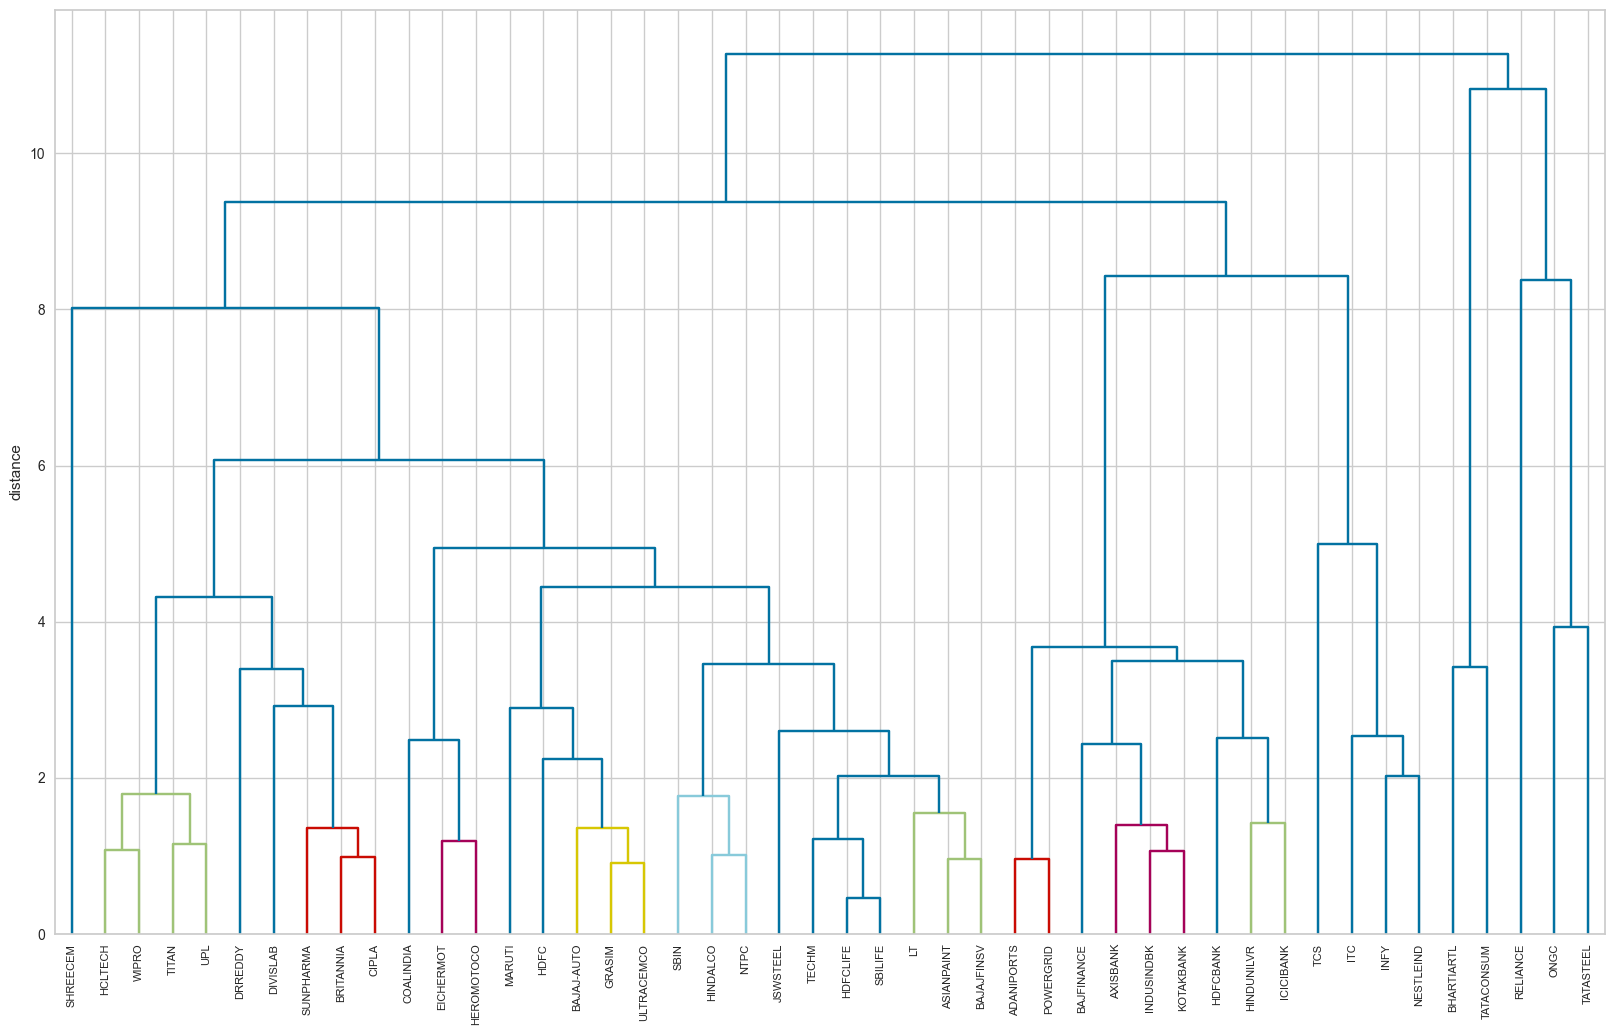

In [31]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')


In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(distance_threshold=6,n_clusters =None, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(X_stock)

hc.pre

c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [40]:
pd.DataFrame(y_pred,columns=["label"]).value_counts()

label
1        18
3         9
4         9
0         4
2         2
7         2
5         1
6         1
Name: count, dtype: int64